# Qiskit: Basics on Python and Quantum Computing
### By: Yudeep Rajbhandari

## Quantum Hello world!

We import the libraries or modules

In [1]:
from qiskit import *

We introduce a line to draw the graphs in the nb

In [2]:
%matplotlib inline

We introduce the next line to know more about the environment.

In [3]:
!pip3 freeze | grep qiskit 

'grep' is not recognized as an internal or external command,
operable program or batch file.


We create the quantum and classical registers

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

To add the last registers in the circuit

In [5]:
circuit = QuantumCircuit(qr,cr)

We draw the circuit through two ways
1. basic

In [6]:
        circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

2. medium

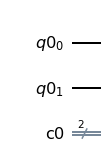

In [7]:
circuit.draw(output='mpl')

## Example

In [8]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

## Apply a gate in the circuit

We apply the Hadamard gate (H-gate is _superposition_ same probability):
1. circuit.h(qr): for all quantum registers
2. circuit.h(qr[i]): for the i-quantum register.

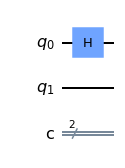

In [9]:
circuit.h(qr[0])
circuit.draw(output='mpl')

## Multiqbit Gates

We add the X-gate (control not or control-X, which is entanglement):
1. circuit.cx[qr[0],qr[1]].

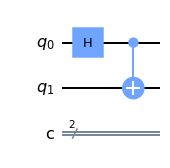

In [10]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

Now, we measure:

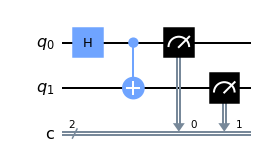

In [11]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Concepts

1. Backend is the environment where we can simulate one quantum computer.
2. Pay (time or money) in the tons of works before yours.

## Some quantum computers:
- ibmq_16_melbourne
- ibmq_london
- etc.

We create the _backend_:

In [12]:
bcknd = Aer.get_backend('qasm_simulator')

We execute and get the result:

In [13]:
rslt = execute(circuit, backend=bcknd).result()

And call the modules/libraries to plot the histogram

In [14]:
from qiskit.tools.visualization import plot_histogram

Draw the histogram

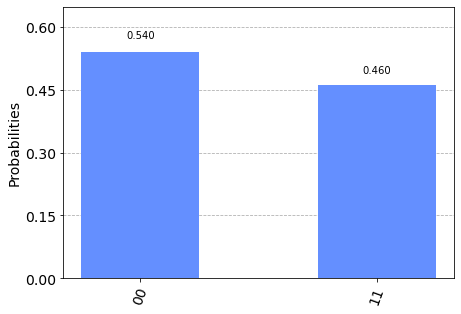

In [15]:
plot_histogram(rslt.get_counts(circuit))

## How to use the Quantum Computer real

We are going to connect with ourself account (I changed my token, you should do same)

In [16]:
IBMQ.delete_account()

In [17]:
IBMQ.active_account()


In [18]:
IBMQ.save_account('8f96d5e2e0b754862fe69be4953c98e08206c302188ac9456e19b0951efc51acfc469a7c766ad9bcc5ffe7bc4bc83681fc911b78a680be8c62a57e87d899fb96')
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

We can see different quantum computers to execute the algorithm/circuit.

In [19]:
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Remember it is important to know the quantum computer arqchitecture.
**Hint:** go to ref. 4 to see the jobs in the computing.

In [20]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')

Execute the circuit in the quantum computer.

In [21]:
job=execute(circuit, backend=qcomp)

import the tools to show the results

In [22]:
from qiskit.tools.monitor import job_monitor

To know the job status.

In [23]:
job_monitor(job)

Job Status: job has successfully run


Assign the result to new variable.

In [24]:
rslt=job.result()

Draw the histogram

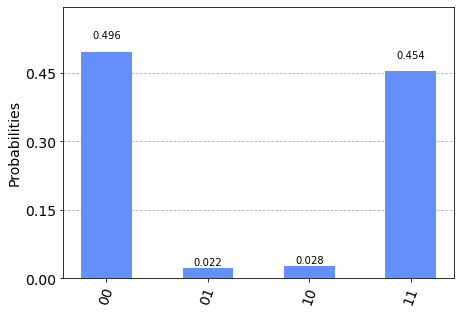

In [25]:
plot_histogram(rslt.get_counts(circuit))

# Exercise

1. Use your account, and your token and re run this NB. 
2. Reproduce this NB with 3 qubits, use the simulator and the quantum computer.
3. Use another provider.
4. Compare and analyze your results. 
5. Write a report. Instructions during the course.

I left some gifs to help with the token and the provider selection.

<img src="../GIF/quantumIBM_token_a.gif" width="350" align="center">

configrc.store_credentials:WARNING:2022-07-24 21:42:38,252: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-07-24 21:42:38,538: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


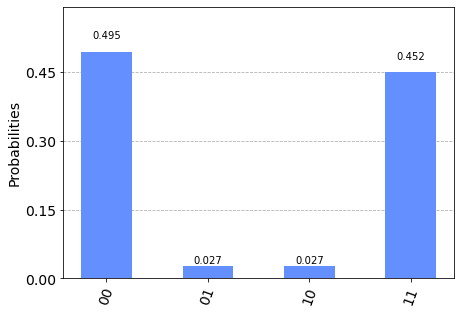

In [26]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)
circuit.draw()
circuit.draw(output='mpl')
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()
circuit.h(qr[0])
circuit.draw(output='mpl')
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')
circuit.measure(qr,cr)
circuit.draw(output='mpl')

bcknd = Aer.get_backend('qasm_simulator')
rslt = execute(circuit, backend=bcknd).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(rslt.get_counts(circuit))
IBMQ.save_account('8f96d5e2e0b754862fe69be4953c98e08206c302188ac9456e19b0951efc51acfc469a7c766ad9bcc5ffe7bc4bc83681fc911b78a680be8c62a57e87d899fb96')
IBMQ.load_account()
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')
job=execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
rslt=job.result()
plot_histogram(rslt.get_counts(circuit))

<img src="../GIF/quantumIBM_token_B.gif" width="350" align="center">

In [27]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.9.12


'grep' is not recognized as an internal or external command,
operable program or batch file.


# References


1. Qiskit tutorial: https://qiskit.org/documentation/install.html
2. Github tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials
3. youtube video: https://www.youtube.com/watch?v=L4jYKGrxKRE&feature=youtu.be
4. IBM account: https://quantum-computing.ibm.com/
<!--
https://quantum-computing.ibm.com/
My count with gmail in ciencias.unam
and Github
-->